# Hands-on 1: Multiplexação OFDM (ortogonalidade, transmissão e recepção, desempenho em canal AWGN)

# Objetivos
As metas desse tutorial são ajudar o usuário a:
- Entender a modelagem da multiplexação OFDM;
- Entender o processo de ortogalização entre subportadoras OFDM;
- Entender a modelagem da demultiplexação OFDM;
- Demonstrar o processo de demultiplexação OFDM em canais AWGN.

# Transmissão digital por multiplexação de multiportadoras

Uma modelo bem simples de uma cadeia de comunicação digital pode ser representada pelo diagrama de blocos mostrado a seguir.

![fig_diagrama_singlecompleto](./FIGS/HD_01/diagrama_single_completo.png)

O objetivo geral é que as mensagens (sequências de bits) sejam transmitidas da **fonte de dados** (\textit{Data Source}) para o **coletor de dados** (\textit{Data Sink}). O transmissor consiste em: um mapeador de símbolos (\textit{Symbol Mapper}), que converte os bits em amplitudes; um filtro de transmissão (\textit{Transmit Filter}), que gera um sinal de banda base analógico; e um modulador, que converte o sinal da banda-base para uma frequência mais alta adequada para transmissão através do canal (\textit{Bandpass Channel}). O receptor consiste em: um demodulador (\textit{Demodulator}), para converter o sinal recebido em banda-passante de volta para a banda-base; um detector, que filtra (\textit{Detector}) e amostra o sinal banda-base; e um dispositivo de decisão (\textit{Decision Device}), que estima o valor de cada bit transmitido.

Sistemas contemporâneos como o o LTE, o Wi-Fi e o WiMaX adicionam a **multiplexação por multiportadoras** em sua cadeia de transmissão digital, ganhando em proteção contra desvanecimento por multipercursos e interferência co-canal, bem como aumentando a taxa de transmissão devido a multiplexação de dados. Em tais sistemas, um ou mais esquemas de multiplexação são utilizados, a citar:
- OFDM (_Orthogonal Frequency Division Multiplex_): Sistemas Wi-Fi;
- OFDMA (_Orthogonal Frequency Division Multiple Access_): Sistemas LTE e WiMaX
- SC-FDMA (_Single Frequency Division Multiple Access_): Sistemas LTE;

Dadas as suas vantagens e o sucesso com os sistemas 4G, a multiplexação por multiportadoras é alvo de estudos para compor também o 5G. Neste Hands-on, entenderemos melhor o funcionamento do OFDM, compreendendo e analisando suas vantagens e desvantagens.

# Prática 1:  Divisão na frequência e ortogonalidade

Em modulações de múltiplas portadoras, a largura de banda disponível é subdividida em um número de subcanais (ou subportadoras) de mesma largura de banda, como visto abaixo:

![Figura01](./FIGS/HD_01/Figura_1.png)

A quantidade de subcanais é dada por $K = W/\Delta f$, sendo $W$ a largura de banda total, e $\Delta f$ a separação entre subportadoras adjacentes. Assim, símbolos de informação diferentes são transmitidos simultaneamente e de forma síncrona nos $K$ subcanais. Os dados aqui (mostrados na Figura 1) são transmitidos por multiplexação por divisão de frequência (FDM).

Para cada subcanal, associaremos uma portadora:

$$ x_{k}(t)=sen(2\pi f_{k} t), $$ 

sendo $k=0,1,...,K-1$ e $f_{k}$ a frequência central do canal $k$. Escolhendo uma taxa de símbolo $1/T$ em cada um dos subcanais com largura de banda igual a $\Delta f $, deseja-se que:

$$ \int_{0}^{T}sen(2 \pi f_{k} t + \varphi_{k}) \cdot sen(2 \pi f_{j} t + \varphi_{j}) = 0, $$ 

sendo $\left (f_{k} − f_{j}\right ) = \frac {n}{T}$, com $n$ até o tamanho que se deseje. E essa relação é verdadeira para quaisquer $\varphi _{k}$ e $\varphi _{j}$ . Ou seja, as subportadoras são ortogonais na duração de símbolo $T$, independentemente da fase entre as duas subportadoras.
Com essa restrição, a multiplexação se torna por Divisão Ortogonal de Frequência (OFDM). 

O sistema OFDM é utilizado para evitar os efeitos da interferência entre subportadoras. As subportadoras são arranjadas de tal forma que no centro de suas frequências se tenha um nulo, como mostra a figura a seguir.

![Figura02](./FIGS/HD_01/Figura_2.png)

Se $T_{s}$ é o intervalo de símbolo em um sistema de portadora única, o intervalo de símbolo em um sistema OFDM de $K$ subcanais é $T = K \cdot T_{s}$. Na figura a seguir, vemos um caso no qual o multipercurso causa um espalhamento temporal significativo, fazendo com que sua parte final ultrapasse o tempo de símbolo e ocupe o tempo do próximo símbolo. Essa interferência é comum em sistemas OFDM e pode ser tratada deixando um tempo de guarda entre os símbolos. Esse tempo deve ser escolhido de forma a ser maior que o espalhamento causado pelo canal. Esse assunto não é foco deste hands-on.

![Figura03](./FIGS/HD_01/Figura_3.png)



### Descrição do experimento

Sendo duas subportadoras de um sinal OFDM: 

$$ x_{k}(t) = sen(2\pi f_{k} t + \phi_{k} )   $$

$$ x_{j}(t) = sen(2\pi f_{j} t + \phi_{j} ), $$

para $0 \leq t \leq T.$

Considerando $f_{k} = 2$ Hz e $f_{j} = f_{k} + n/T$, com $ n = 1, 2, 3$; e as fases $\phi_{k}$ e $\phi_{j}$
arbitrárias, variando de $ [0,2\pi]$. Demonstre a propriedade da ortogonalidade usando os sinais amostrados $x_{k}(mT_{s})$  e $x_{j}(mT_{s})$, com
>$T_{s} = 1/5 \; s $ 

>$T = 10 \; s $ 

>$M = T/T_{s} = 50 \rightarrow $ Número de subcanais 

>$m = 0,1,2, \; ... M − 1 = 0,1,2, \; ... , 49 $

**Passo 01:** Abra um script no Matlab, salve-o como **handson10_1.m** e escreva o seguinte código:

In [1]:
clc;clear all;close all;
% Passo 1: Geração de fases aleatórias
phi_k = 2*pi*rand;
phi_j = 2*pi*rand; 
%
% Passo 2: Geração de sinais amostrados 
M = 50;
m = 0:M-1;
x_k = sin(4*pi*m/5+phi_k);
n = 1;
x_j_1 = sin(4*pi*m/5+2*pi*m*n/M+phi_j);
n = 2;
x_j_2 = sin(4*pi*m/5+2*pi*m*n/M+phi_j);
n = 3;
x_j_3 = sin(4*pi*m/5+2*pi*m*n/M+phi_j);
%
% Passo 3: Verificação de ortogonalidade  
Sum1 = sum(x_k.*x_j_1);
disp(['O resultado para n=1 é: ' , num2str(Sum1)])
Sum2 = sum(x_k.*x_j_2);
disp(['O resultado para n=2 é: ' , num2str(Sum2)])
Sum3 = sum(x_k.*x_j_3);
disp(['O resultado para n=3 é: ' , num2str(Sum3)])

O resultado para n=1 é: 4.8982e-14
O resultado para n=2 é: 2.2801e-14
O resultado para n=3 é: 5.0709e-14


### Comentários sobre o código

- Inicialmente (Passo 1), geramos fases aleatórias $\phi_{k}$ e $\phi_{j}$. Com  $\phi_{k}$ sendo para a primeira subportadora e $\phi_{j}$ para as demais. Lembre que a função $rand()$ gera um número aleatório entre 0 e 1.
> ```python
% Passo 1: Geração de fases aleatórias
phi_k = 2*pi*rand;
phi_j = 2*pi*rand; 
```

- Em seguida (Passo 2), definimos as variáveis $M$ e $ n$, além de gerar os sinais das suportadoras.
Como os sinais são amostrados, representamos o eixo do tempo como $ t = m \, T_{s}$, sendo $m \in \mathbb{Z}$  tal que $m=[0,49]$:
$$  x_{k}(t)=x_{k}\left ( mT_{s}\right ) = sen \left ( 2\pi f_{k} \left ( mT_{s} \right ) +\phi_{k} \right )$$
Ao substituir $\left\{\begin{matrix}f_{k} =&2Hz\\ T_{s}= &1/5 s\end{matrix}\right.$, obtemos:
$$  x_{k}\left ( mT_{s}\right ) =  sen \left ( 4\pi \left ( mT_{s} \right ) +\phi_{k} \right )  = sen \left ( \frac{4\pi m}{5}+\phi_{k} \right )  $$
Já para cada $x_{j}$, cuja frequência é dada por $f_{j} = f_{k} + n/T $, podemos escrever:
$$ x_{j}\left ( mT_{s} \right ) =  sen \left [ 2\pi \, \left ( f_{k}+n/T\right )   \, \left ( mT_{s}\right ) +\phi_{j}\right ]  = sen\left [ 2\pi \;f_{k}  \; mT_{s} +2\pi \;  mn\; \left ( T_{s}/T \right ) +\phi_{j}\right ] $$
Ao substituir  $\left\{\begin{matrix}T_{s} =&1/5\, s\\ T = &10\, s\\ f_{k} = & 2 Hz\end{matrix}\right.$, podemos escrever:
$$  x_{j}\left ( mT_{s} \right ) =sen \left ( \frac{4\pi m} { 5} +\frac{ 2\pi mn}{50}+ \phi_{j}\right ),  $$
sendo $n=j=1,2,3$
Veja que nessa passo um sinal $x_k$ e três sinais $x_j$ são criados:
>```python
% Passo 2: Geração de sinais amostrados 
M = 50;
m = 0:M-1;
x_k = sin(4*pi*m/5+phi_k);
n = 1;
x_j_1 = sin(4*pi*m/5+2*pi*m*n/M+phi_j);
n = 2;
x_j_2 = sin(4*pi*m/5+2*pi*m*n/M+phi_j);
n = 3;
x_j_3 = sin(4*pi*m/5+2*pi*m*n/M+phi_j);
```
- A ortogonalidade é comprovada em seguida (Passo 3). Dois sinais são ditos ortogonais se:
$$ \int_{0}^{T} x_{k}(t) \cdot x_{j}(t) = 0$$
Aplicando ao nosso caso
$$ \int_{0}^{T} \left (sen(2\pi f_{k}t+\phi_{k}) \cdot sen(2\pi f_{j}t+\phi_{j})\right ) dt = 0$$
Como tratamos de sinais discretos (amostrados):
$$ \sum_{m=0}^{49}x_{k}(mT_{s})\cdot x_{j}(mT_{s}) $$
Calculando no Matlab os três somatórios, para cada valor de $n$:
>```python
% Passo 3: Verificação de ortogonalidade  
Sum1 = sum(x_k.*x_j_1);
disp(['O resultado para n=1 é: ' , num2str(Sum1)])
Sum2 = sum(x_k.*x_j_2);
disp(['O resultado para n=2 é: ' , num2str(Sum2)])
Sum3 = sum(x_k.*x_j_3);
disp(['O resultado para n=3 é: ' , num2str(Sum3)])
```

- Como é evidenciado na execução do código, esses valores são praticamente zero, de modo que dessa forma comprovamos a ortogonalidade entre as subportadoras $x_{k}(t)$ e $x_{j}(t)$ para quaisquer valores de $\phi_{k}$ e $\phi_{j}$.

## Prática 2: Transmissão de um sinal OFDM

Um esquema simplificado do transmissor $OFDM$ é mostrado na figura:

![fig_Figura04](./FIGS/HD_01/Figura_4.png)

Pela figura, a multiplexação por subportadoras do OFDM é obtida por meio da IFFT no transmissor, responsável por juntar as várias subportadoras em um único sinal. Já no receptor, a separação das subportadoras é realizada pela FFT.

A modulação QAM (_Quadrature Amplitude Modulation_) é usada em sistemas mais modernos devido sua maior eficiência espectral. No sistema LTE, por exemplo, a modulação pode ser do tipo QPSK (Quadrature Phase Shift Keying), 16-QAM, 64-QAM ou 256-QAM. A modulação M-QAM é explora fase e amplitude do sinal no processo de modulação. Esse tipo de modulação é constituído de $M$ símbolos, cada qual representado por $k = log_{2}(M)$ bits. Neste hands-on, utilizaremos o OFDM com 16-QAM. Ou seja, existirão 16 símbolos, cada um com uma respectiva amplitude e fase, representando uma sequência de 4 bits, como mostrado no diagrama de constelação a seguir.

![Figura05](./FIGS/HD_01/Figura_5.png)

Assim, cada símbolo QAM pode ser escrito como um número complexo, como mostrado na tabela a seguir. Entretanto, é importante enfatizar que podemos representar a sequência de 4 bits com fases e amplitudes diferentes das mostradas na figura e na tabela. Ou seja, aqui estamos representando a sequência $1010 $ como $1 + 1j$, mas pode existir outra constelação em que essa mesma sequência seja representada por $ 3 − 3j$, por exemplo. O importante é, independente de como é construído, o diagrama de constelação precisa ser conhecido tanto no transmissor quanto no receptor. Isso geralmento é definido nas especificações técnicas de cada sistema.

Tabela 1: Correspondência entre os símbolos 16-QAM e os valores binários e decimais.

| Número em decimal |   Número em binário        | Número complexo correspondente à constelação 16-QAM ($X_{k}$)|
|:------:|:-------------:|:-----:|
|0 |0000|-3-3j|
|1 |0001|-3-1j|
|2 |0010|-3+1j|
|3 |0011|-3+3j|
|4 |0100|-1-3j|
|5 |0101|-1-1j|
|6 |0110|-1+1j|
|7 |0111|-1+3j|
|8 |1000|1-3j |
|9 |1001|1-1j |
|10|1010|1+1j |
|11|1011|1+3j |
|12|1100|3-3j |
|13|1101|3-1j |
|14|1110|3+1j |
|15|1111|3+3j |


Já um símbolo OFDM é geradop por meio de K subportadoras independentes, em que cada subportadora é modulada por símbolos a partir de uma constelação QAM, obtendo ao final um valor complexo. Dessa forma, cada ponto de valor complexo corresponde à informação de uma respectiva subportadora $x_{k}$ , sendo $k=0, 1, ... K-1$. Assim, os símbolos de informação $X_{k}$ representam os valores de entrada uma IDFT que gera o sinal OFDM, no nosso caso, sendo QAM a modulação de cada portadora. A IDFT deve obedecer à simetria $X_{N−k} = X_{k}^{*} $, sendo $X_{k}^{*}$ o conjugado de $X_{k}$. Para fazer isso, basta concatenar o vetor $X_{k}$ com $X_{k}^{*}$ na ordem inversa (como veremos a seguir). Dessa forma, cria-se, a partir de $K$ símbolos de informação, uma sequência de $N=2K$
símbolos, a qual chamaremos de $X_{k}^{'}$.
Com isso, montamos a IDFT com $X_{k}^{'}$, obtendo o sinal $x_{n}$ como:
$$x_{n}= \frac{1}{\sqrt{N}}    \sum_{k=0}^{N-1}X_{k}^{'} e^{j2\pi n \frac{k}{N} },$$
com $n=1, 2, ..., N-1 $ e $1/ \sqrt{N}$ sendo simplesmente um fator de escala. O sinal $x_{n}$ representa as amostras de um símbolo OFDM $x(t)$ composto das múltiplas subportadoras. Sendo  $ x_{n} = x\left ( \frac{nT}{N}   \right) $, $x(t)$ pode ser representado por:
$$x(t)= \frac{1}{\sqrt{N}}    \sum_{k=0}^{N-1}X_{k}^{'} e^{j2\pi n \frac{kt}{T} }$$,
para $0\leq t \leq T$, sendo $T$ a duração/intervalo do sinal (duração do símbolo OFDM).

### Descrição do experimento

O experimento dessa prática consiste em gerar um sinal OFDM $x$ com $100$ bits pseudoaleatórios, modulação 16-QAM, $T = 50$ segundos e $T_{s} = 2 $ segundos. Desejamos mostrar a forma de onda de $x(t)$ e, em seguida, computar os valores de $x_{n}$, mostrando graficamente que $ x_{n} = x\left ( \frac{nT}{N}   \right) $.


**Passo 01:** Abra um script no Matlab, salve-o como **handson10_2.m** e escreva o seguinte código:

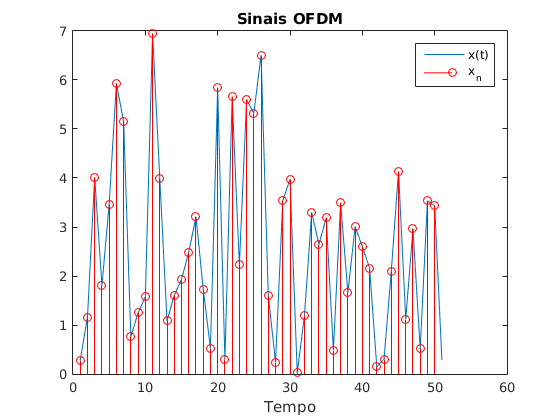

In [5]:
clear all; close all;clc;
% Parâmetros
n_bits = 100;            % Número de bits
T = 50;                  % Tempo de símbolo
Ts = 2;                  % Tempo de símbolo em portadora única
K = T/Ts;                % Número de subportadoras independentes
N = 2*K;                 % N pontos da IDFT
%
% Gerar bits aleatórios
dataIn=rand(1,n_bits);   % Sequência de números entre 0 e 1 uniformemente distribuídos
dataIn=sign(dataIn-.5);  % Sequência de -1 e 1
% Conversor serial paralelo
dataInMatrix = reshape(dataIn,n_bits/4,4);
%
% Gerar constelaçao 16-QAM
seq16qam = 2*dataInMatrix(:,1)+dataInMatrix(:,2)+1i*(2*dataInMatrix(:,3)+dataInMatrix(:,4)); 
seq16=seq16qam';
% Garantir propriedadade da simetria
X = [seq16 conj(seq16(end:-1:1))]; 
%
% Construindo xn
xn = zeros(1,N);
for n=0:N-1
    for k=0:N-1
        xn(n+1) = xn(n+1) + 1/sqrt(N)*X(k+1)*exp(1i*2*pi*n*k/N);
    end
end
%
% Construindo xt
xt=zeros(1, T+1);
for t=0:T
    for k=0:N-1
        xt(1,t+1)=xt(1,t+1)+1/sqrt(N)*X(k+1)*exp(1i*2*pi*k*t/T); 
    end 
end 
%
% Plots
plot(abs(xt));
hold on
stem(abs(xn), 'r')
hold off
title('Sinais OFDM')
legend('x(t)','x_n')
xlabel('Tempo')

### Comentários sobre o código

- Inicialmente, vamos declarar as principais variáveis do código: O número de bits  $ n_{bits} = 100$; O tempo de símbolo OFDM $T = 100$ segundos; E o tempo de símbolo modulado $T_{S} = 2$ segundos. Com isso, podemos calcular: o número de subportadoras ($K$), dada pela relação entre $T$ e $T_{S}$; e do número de pontos da IDFT ($N=2K$). Temos, então, $25$ subportadoras e $50$ pontos de DFT.
>```python
% Parâmetros
n_bits = 100;            % Número de bits
T = 50;                  % Tempo de símbolo
Ts = 2;                  % Tempo de símbolo em portadora única
K = T/Ts;                % Número de subportadoras independentes
N = 2*K;                 % N pontos da IDFT
...
```

- Em seguida, iremos gerar os $100$ bits pseudoaleatórios utilizando a função $rand()$. Essa função gera números entre $0$ e $1$ a partir de uma distribuição uniforme, de modo que há igual probabilidade de gerar números maiores que $0,5$ e menores que $0,5$. Subtraindo esse sinal de $0,5$, obteremos, então, valores uniformemente distribuídos entre $-0,5$ e $ 0,5$ . A função $sign()$ substituirá os valores negativos por $-1$ e valores positivos por $1$. Por fim, organizaremos essa sequência, que antes estava em um vetor de uma linha e $n_bits$ colunas, em uma matriz de quatro colunas e $n_bits$/4 linhas utilizando a função $reshape()$. Dessa forma, o vetor $dataIn$ que tem tamanho 1x100 gerará a matriz $dataInMatrix$ de tamanho 25x4, realizando uma conversão serial para paralelo.
>```python
...
% Gerar bits aleatórios
dataIn=rand(1,n_bits);   % Sequência de números entre 0 e 1 uniformemente distribuídos
dataIn=sign(dataIn-.5);  % Sequência de -1 e 1
% Conversor serial paralelo
dataInMatrix = reshape(dataIn,n_bits/4,4);   
...
```
- Com os bits devidamente organizados, podemos então gerar a constelação 16-QAM. Faremos isso de modo que os dois primeiros bits representem a parte real da constelação e os dois últimos a parte imaginária, ou seja, respeitando a constelação mostrada anteriormente e a Tabela 1. Obteremos assim a variável $seq16qam$. Para calcular $X_{k}^{′}$ e obtê-lo como um vetor de uma linha e $N$ colunas, calculamos a transposta de $seq16qam$ e, para manter a propriedade da simetria da DFT, concatenamos $seq16$ com seu conjugado na ordem inversa. Assim, geramos o vetor $X$.
>```python
...
seq16qam = 2*dataInMatrix(:,1)+dataInMatrix(:,2)+1i*(2*dataInMatrix(:,3)+dataInMatrix(:,4)); 
seq16=seq16qam';
% Garantir propriedadade da simetria
X = [seq16 conj(seq16(end:-1:1))]; 
...
```

- Os valores de $X$ serão usados para calcular o sinal analógico a ser transmitido, $x(t)$, e a sua versão amostrada, $x_{n}$ . Perceba que o tamanho do vetor $X$ é o dobro do tamanho de $seq16$ e que os tamanhos de $seq16$ e de $X$ são iguais a $K$ e $N$, respectivamente. Já mostramos que para montar a IDFT com $X_{k}^{'}$ fazemos:
$$x_{n}= \frac{1}{\sqrt{N}}    \sum_{k=0}^{N-1}X_{k}^{'} e^{j2\pi n \frac{k}{N} }$$
Dessa forma, podemos gerar o sinal discreto $x_{n}$:

>```python
% Construindo xk
xn = zeros(1,N);
for n=0:N-1
    for k=0:N-1
        xn(n+1) = xn(n+1) + 1/sqrt(N)*X(k+1)*exp(1i*2*pi*n*k/N);
    end
end 
```

- Como mostrado na parte teórica do experimento, o sinal x(t) a ser enviado é analógico e contínuo, obtido a partir da seguinte equação:
$$x(t) 
= \frac{1}{\sqrt{N}}    \sum_{k=0}^{N-1}X_{k}^{'} e^{j2\pi n \frac{kt}{T} },$$
com $ 0\leq t \leq T$, sendo $T$ a duração $/$ intervalo do sinal, construímos $x(t)$.
Dessa forma, podemos gerar o sinal discreto $x(t)$:
>```python
% Construindo xt
xt=zeros(1, T+1);
for t=0:T
    for k=0:N-1
        xt(1,t+1)=xt(1,t+1)+1/sqrt(N)*X(k+1)*exp(1i*2*pi*k*t/T); 
    end 
end 
```

- A parte final do código é dedicada a mostrar os sinais no tempo. Como os sinais gerados são complexos, mostramos a magnitude (envoltória) utilizando a função $abs()$. Tanto $x_n$ como $x(t)$ são mostrados.
>```python
% Plots
plot(abs(xt));
hold on
stem(abs(xn), 'r')
hold off
title('Sinais OFDM')
legend('x(t)','x_n')
xlabel('Tempo')
```

- Observando o sinal OFDM gerado, podemos notar um grande problema do OFDM: o alto **Peak-to-Average-Power-Ratio** (PAPR), ou , a alta razão entre o valor de potência máximo e a sua média. Sinais com alto PAPR podem saturar os amplificadores de potência do transmissor, causando distorção de intermodulação no sinal transmitido. No caso dos sistemas LTE, esse é um dos motivos pelos quais o OFDM não é utilizado no uplink, pois o alto PAPR encarece os amplificadores e obriga que eles possuam baixa eficiência de energia, por não poderem apresentar alto ganho, procura-se reduzir a complexidade do equipamento móvel. Como no downlink, a transmissão está na estação base, isso não é um problema.

- Como podemos observar, o sinal $x_{n}$ representa bem o sinal $x(t)$, e podemos afirmar que $x_{n} = x\left (\frac{nT}{N} \right )$.

# Prática 3: Recepção OFDM

Um esquema simplificado de um receptor OFDM é mostrado na figura a seguir.

![Figura06](./FIGS/HD_01/Figura_6.png)

O primeiro bloco, mostrado como um conversor A $\rightarrow $D (analógico-digital) é simplesmente a amostragem do sinal $x(t) $ que chega ao receptor, obtemos com isso o sinal amostrado $x_{n}$. O segundo bloco é a transformada discreta de Fourier (DFT), que faremos com $x_{n}$ para obtermos $X_{k}$, ou seja, os símbolos representados por pontos na constelação 16-QAM. A DFT é dada por:

$$ X_{k} = \sum_{j=1}^{N} x(j) \cdot  \omega_{N}^{(j-1)(K-1)},$$

sendo $k=0, 1, ..., N-1$.

Entretanto, como veremos nesse experimento, os pontos $X_{k}$ obtidos pela DFT podem não ser exatamente aqueles valores pré-determinados na Tabela 1, por exemplo, se a comunicação estiver sujeita a ruído e outras manifestações do canal rádio móvel. Será, então, realizada uma decisão sobre qual é o símbolo que $X_{k}$ o sinal demodulado representa. Faremos isso a partir da proximidade de $X_{ k}$ com a constelação 16-QAM.

Por exemplo, caso $X_{1}= 1,5 + j1,5$, ele será interpretado por 1 + j1, que é o valor da constelação 16-QAM mais próximo. Isso é ilsutrado na figura a seguir, que mostra a constelação 16-QAM sendo representada por pontos azuis e o valor suposto de $X_{1}$ representado por uma cruz vermelha. Por fim, consultando a Tabela 1, concluímos que $X_{1}$ representa a sequência de bits $1010$. 

![Figura07](./FIGS/HD_01/Constelacao16QAM.png)

### Descrição do experimento
Considere o mesmo sinal gerado na **Prática 2**, mas supondo que o sinal enviado foi corrompido por um ruído aditivo gaussiano branco (AWGN) de média zero e variância $\sigma^2 = 2$ (pode ser um parâmetro a ser escolhido pelo usuário). O sinal recebido amostrado $r_{n}$ será, então:
$$r_{n} = x_{n} + ruido$$
Calcule os valores de $r_{n}$ e sua DFT $Y_{k}$. Mostre graficamente a constelação de $Y_{k}$ e os valores da constelação 16-QAM para cada valor de $k$. Então estime os valores dos símbolos recebidos $Z_{k}$ e contabilize quantos símbolos foram recebidos erroneamente. Utilize $\sigma =\left \{ 2, 0.5, 1 \right \}$.


**Passo 01:** Abra um script no Matlab, salve-o como **handson10_3.m** e escreva o seguinte código:

Para variância de 0 houve 0 símbolos errados.
Para variância de 0.1 houve 1 símbolos errados.
Para variância de 1 houve 109 símbolos errados.


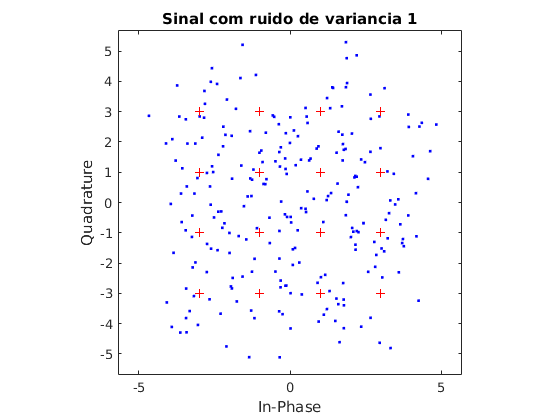

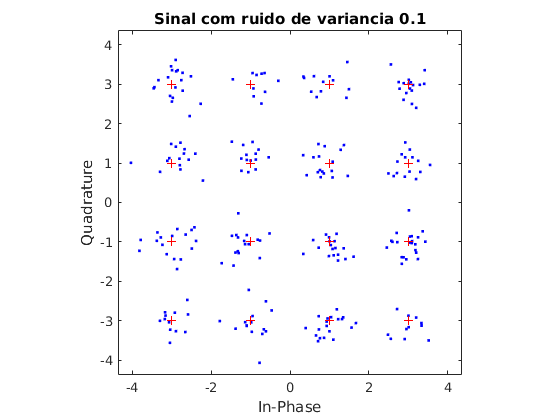

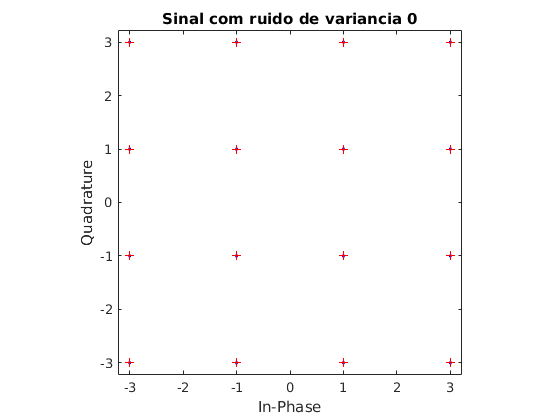

In [7]:
clear all; clc; close all
% Parâmetros
n_bits = 1000;                % Número de bits
T = 500;                      % Tempo de símbolo OFDM
Ts = 2;                       % Tempo de símbolo em portadora única
K = T/Ts;                     % Número de subportadoras independentes
N = 2*K;                      % DFT de N pontos
sigmas=[0 0.1 1];             % Vetor de variâncias do ruído
%
% Gerar bits aleatórios
dataIn=rand(1,n_bits);   % Sequência de números entre 0 e 1 uniformemente distribuídos
dataIn=sign(dataIn-.5);  % Sequência de -1 e 1
% Conversor serial paralelo
dataInMatrix = reshape(dataIn,n_bits/4,4);
%
% Gerar constelaçao 16-QAM
seq16qam = 2*dataInMatrix(:,1)+dataInMatrix(:,2)+1i*(2*dataInMatrix(:,3)+dataInMatrix(:,4)); 
seq16=seq16qam';
% Garantir propriedadade da simetria
X = [seq16 conj(seq16(end:-1:1))]; 
%
% Construindo xn
xn = zeros(1,N);
for n=0:N-1
    for k=0:N-1
        xn(n+1) = xn(n+1) + 1/sqrt(N)*X(k+1)*exp(1i*2*pi*n*k/N);
    end
end
% 
% Loop de variâncias
for ik = 1:length(sigmas)
    %
    % Adição de ruído
    variance = sigmas(ik);
    noise = sqrt(variance)*randn(1,N)+1i*sqrt(variance)*randn(1,N);
    %
    % sinal recebido = xn + ruído 
    rn = xn+noise;
    % DFT de rn
    Y = zeros(1,K);
    for k=0:K-1
        for n=0:N-1
            Y(1,k+1) = Y(1,k+1) + 1/sqrt(N)*rn(n+1)*exp(-1i*2*pi*k*n/N);
        end
    end
    %
    % Plots
    scatterplot(Y)
    hold on
    scatter(real(seq16),imag(seq16), 'r', '+')
    hold off
    title(['Sinal com ruído de variância ', num2str(variance)]);
    % Demodulação  
    for k= 1:length(Y) % Para percorrer todo o vetor Yk 
        if real(Y(1,k)) > 0 % Para parte real de Yk positiva
            if real(Y(1,k)) > 2
                Z(1,k) = 3;
            else
                Z(1,k) = 1;
            end
        else % Para parte real de Yk negativa ou igual a zero
            if real(Y(1,k)) < -2
                 Z(1,k) = -3;
            else
                 Z(1,k) = -1;
            end
        end

        if imag(Y(1,k)) > 0 % Para parte imaginaria de Yk positiva
            if imag(Y(1,k)) > 2
                Z(1,k) = Z(1,k) + 1i*3;
            else
                Z(1,k) = Z(1,k) + 1i;
            end
        else % Para parte imaginaria de Yk negativa ou igual a zero
            if imag(Y(1,k)) < -2
                 Z(1,k) = Z(1,k) - 1i*3;
            else
                 Z(1,k) = Z(1,k) - 1i;
            end
        end
    end
    % Contagem de erro
    error = length(find(Z(1,2:K)-X(1,2:K)));
    disp(['Para variância de ', num2str(variance), ' houve ', num2str(error), ' símbolos errados.']);
end

### Comentários sobre o código

- Inicialmente, definimos as variáveis de entrada do programa. O destaque é para a variável **sigmas**, que define os valores de variância do ruído a serem simulados.
>```python
clear all; clc; close all
% Parâmetros
n_bits = 1000;                % Número de bits
T = 500;                      % Tempo de símbolo OFDM
Ts = 2;                       % Tempo de símbolo em portadora única
K = T/Ts;                     % Número de subportadoras independentes
N = 2*K;                      % DFT de N pontos
sigmas=[0 0.1 1];             % Vetor de variâncias do ruído
...
```

- Em seguida, vamos gerar os $1000$ bits aleatórios, os símbolos da constelação 16-QAM e o sinal $x_{n}$ , da mesma forma que fizemos na **Prática 2**.
>```python
...
% Gerar bits aleatórios
dataIn=rand(1,n_bits);   % Sequência de números entre 0 e 1 uniformemente distribuídos
dataIn=sign(dataIn-.5);  % Sequência de -1 e 1
% Conversor serial paralelo
dataInMatrix = reshape(dataIn,n_bits/4,4);
%
% Gerar constelaçao 16-QAM
seq16qam = 2*dataInMatrix(:,1)+dataInMatrix(:,2)+1i*(2*dataInMatrix(:,3)+dataInMatrix(:,4)); 
seq16=seq16qam';
% Garantir propriedadade da simetria
X = [seq16 conj(seq16(end:-1:1))]; 
%
% Construindo xn
xn = zeros(1,N);
for n=0:N-1
    for k=0:N-1
        xn(n+1) = xn(n+1) + 1/sqrt(N)*X(k+1)*exp(1i*2*pi*n*k/N);
    end
end
...
```

- Em seguida, entramos em um loop, e para cada valor de **sigmas**, realizamos as etapas a seguir.

- Geramos o ruído AWGN complexo, que possui influência no eixo imaginário e real, isto é, influencia na amplitude e na fase do sinal. Utilizando a raiz da variância (desvio padrão ou potência do ruído) para gerar amostras em amplitude.  Assim, geraremos o ruído e o adiconamos ao sinal $x_{n}$, obtendo o sinal recebido $r_{n}$.

>```python
...
% Loop de variâncias
for ik = 1:length(sigmas)
    %
    % Adição de ruído
    variance = sigmas(ik);
    noise = sqrt(variance)*randn(1,N)+1i*sqrt(variance)*randn(1,N);
    %
    % sinal recebido = xn + ruído 
    rn = xn+noise;
    ...
end
```

- Com o sinal recebido amostrado $r_{n}$ , vamos calcular sua DFT, obtendo $Y_{k}$, da seguinte maneira:
$$ Y_{k} = \frac{1}{\sqrt{N}} \cdot \sum_{n=0}^{N-1} r_{n} e^{-j2\pi k \frac{n}{N}}$$

>```python
...
% Loop de variâncias
for ik = 1:length(sigmas)
    ...
    % DFT de rn
    Y = zeros(1,K);
    for k=0:K-1
        for n=0:N-1
            Y(1,k+1) = Y(1,k+1) + 1/sqrt(N)*rn(n+1)*exp(-1i*2*pi*k*n/N);
        end
    end
    ...
end
```

- Com isso, já podemos plotar $Y_{k}$ e os valores da constelação 16-QAM utilizando as funções scatterplot e scatter. Os gráficos obtidos para diferentes variâncias são mostrados na sequência, pois estão dentro do loop. O sinal enviado, $seq16$, é representado com cruzes vermelhas e o sinal recebido $Y_{k}$ com círculos azuis.

>```python
...
% Loop de variâncias
for ik = 1:length(sigmas)
    ...
    % Plots
    scatterplot(Y)
    hold on
    scatter(real(seq16),imag(seq16), 'r', '+')
    hold off
    title(['Sinal com ruído de variância ', num2str(variance)]);
    ...
```

- Na sequência é realizado o processo de demodulação, isolando a parte real e imaginário de $Y$ e comparando com os valores das regiões da constelação do 16-QAM.
>```python
...
% Loop de variâncias
for ik = 1:length(sigmas)
    ...
    % Demodulação  
    for k= 1:length(Y) % Para percorrer todo o vetor Yk 
        if real(Y(1,k)) > 0 % Para parte real de Yk positiva
            if real(Y(1,k)) > 2
                Z(1,k) = 3;
            else
                Z(1,k) = 1;
            end
        else % Para parte real de Yk negativa ou igual a zero
            if real(Y(1,k)) < -2
                 Z(1,k) = -3;
            else
                 Z(1,k) = -1;
            end
        end

        if imag(Y(1,k)) > 0 % Para parte imaginaria de Yk positiva
            if imag(Y(1,k)) > 2
                Z(1,k) = Z(1,k) + 1i*3;
            else
                Z(1,k) = Z(1,k) + 1i;
            end
        else % Para parte imaginaria de Yk negativa ou igual a zero
            if imag(Y(1,k)) < -2
                 Z(1,k) = Z(1,k) - 1i*3;
            else
                 Z(1,k) = Z(1,k) - 1i;
            end
        end
    end
    % Contagem de erro
    error = length(find(Z(1,2:K)-X(1,2:K)));
    disp(['Para variância de ', num2str(variance), ' houve ', num2str(error), ' símbolos errados.']);
end
```

- O último passo é comparar os vetores transmitidos com os recebidos, e contabilizar o número de símbolos errados.
>```python
...
% Loop de variâncias
for ik = 1:length(sigmas)
    ...
    % Contagem de erro
    error = length(find(Z(1,2:K)-X(1,2:K)));
    disp(['Para variância de ', num2str(variance), ' houve ', num2str(error), ' símbolos errados.']);
end
```

- Analisando os gráficos, percebemos que, quanto maior a variância do ruído, mais espalhados se encontram os sinais recebidos, e maiores são as chances de obtermos erros no bloco de decisão. No caso da variância igual a $0$, todos os pontos que chegam ao receptor são iguais ao da constelação original, ou seja, não erros.

# Entrega 01: loopback OFDM em canais AWGN

Faça um loopback de tranmissão e recepção OFDM em Python (ou Matlab) com as seguintes mudanças:

1. Eb/No como variável de entrada. Variar a Eb/No de 0 a 14 dB e calcular a variância do ruído, considerando modulação BPSK e 16-QAM;
2. Usar as funções ifft e fft para multiplexar (Tx) e demultiplexar (Rx);
3. Fazer o gráfico da BER vs Eb/No para com OFDM e, no mesmo gráfico, o gráfico da Pe vs Eb/No (fórmula teórica) das modulações BPSK e 16-QAM com e sem OFDM.

Discuta no seu vídeo os seguintes pontos (pode preparar uma apresentação no power point para facilitar a exposição):

- Exposição da formulação matemática da probabilidade de erro de bit (Pe) teórica. Não precisa prova matemática, mas a exposição da formulação, e a citação da referência de cada modulação;
- Apresentação da formulação matemática do cálculo da potência do ruído para cada modulação (citar referências utilizadas);
- Apresentação e discussão dos gráficos de desempenho: comparação de desempenho das curvas com e sem OFDM;
- Apresentação e discussão dos gráficos de desempenho: comparação das curvas teóricas e de simulação; 
- Apresentação e discussão dos gráficos de desempenho: comparação entre o desempenho das diferentes modulações.

Faça um vídeo youtube, de no máximo 5 minutos, contendo a discussão acima e do código implementado (explicar brevemente o que foi feito, mostrar as formulações, mostrar como rodar o código e os gráficos gerados). O link do vídeo deve ser informado no arquivo README.txt. O vídeo é parte crucial da avaliação.


# Bibliografia

- Carleton University. Laboratory 1 simulation of a simple digital communication system, 2014.
- Mathuranathan Viswanathan. Simulation of Difital Communication Systems Using MATLAB. Mathuranathan Viswanathan at Gaussianwaves, 2014.
- PROAKIS, J. G., SALEHI, M., BAUCH, G. Modern Communication Systems Using Matlab, 3a edição. Cengage Learning, 2013 (título alternativo: Contemporary Communication Systems Using MATLAB).
